In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
def ROC(X,Y,w1,b1,w2,b2):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2)
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
def sig(X):
    return 1/(1+np.exp(-X))
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)

In [213]:
X1  = np.random.randn(500,2)*2 + [0,3]
X2 = np.random.randn(500,2)*.5 + [-2,-2]
X3 = np.random.randn(500,2)*6+[4,0]

In [214]:
Y1 = np.column_stack((np.ones(500),np.zeros(500),np.zeros(500)))
Y2 = np.column_stack((np.zeros(500),np.ones(500),np.zeros(500)))
Y3 = np.column_stack((np.zeros(500),np.zeros(500),np.ones(500)))

In [215]:
X = np.matrix(np.row_stack((X1,X2,X3)))
Y = np.matrix(np.vstack((Y1,Y2,Y3)))
# Y = oneHotEncode(Y,[0])

In [219]:
w1 = np.matrix(np.random.randn(2,6))
w2 = np.matrix(np.random.randn(6,3))
b1 = np.matrix(np.random.randn(1,6))
b2 = np.random.randn(1,3)
errs = []
for i in range(0,10000):
    A1 = X@w1 + b1
    Z1 = tanh(A1)
    A2 = Z1@w2 + b2
    phat = softmax(A2)
    w1 = w1 - .00001*X.T@(np.multiply(
        (phat - Y)@w2.T,(1 - np.multiply(Z1,Z1))))
    w2 = w2 - .00001*Z1.T@(phat - Y)
    b1 = b1 - .00001*np.sum(np.multiply(
        (phat - Y)@w2.T,(1 - np.multiply(Z1,Z1))))
    b2 = b2 - .00001*np.sum(phat - Y)
    errs.append(-np.sum(np.multiply(Y,np.log(phat))))


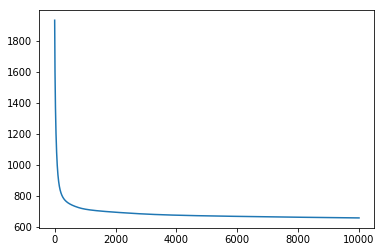

In [220]:
plt.plot(errs)

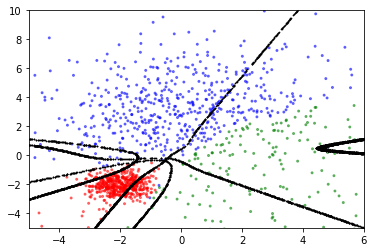

In [221]:
ypred = np.round(phat)

r = np.argmax(ypred, axis = 1).T.tolist()[0]
fakeX = np.random.uniform(-5,20,(3000000,2))
newx = np.matrix(fakeX[np.where(abs(tanh(fakeX@w1 + b1)@w2+b2)<.01)[0]])
colors = ['blue','red',"green"]
z = [colors[i] for i in r]
plt.scatter(X[:,0].tolist(),X[:,1].tolist(),
            c = z,alpha = .5, s = 4)
plt.xlim(-5,6)
plt.ylim(-5,10)
plt.scatter(newx[:,0].T.tolist()[0],
            newx[:,1].T.tolist()[0],c = "black", s = .5)